In [1]:
#A_ch02_105_SVMsKernel.ipynb
#SVMs --核心技巧實作範例

In [2]:
#以 mglearn.tools.make_handcrafted_dataset() 合成資料集
import mglearn
from sklearn.svm import SVC

In [3]:
X,y=mglearn.tools.make_handcrafted_dataset()

In [4]:
mglearn.tools.make_handcrafted_dataset?

In [5]:
#以SVC() 建立模型 'svm', 核心技巧(kernel)='rbf', 正規化參數 C=1.0, 參數gamma=0.1
svm=SVC(kernel='rbf',C=10,gamma=0.1)

In [6]:
#以資料 X,y fit model
svm.fit(X,y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

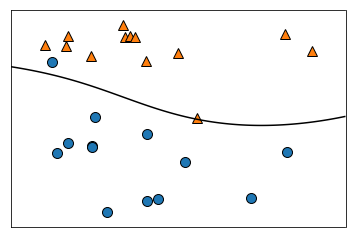

In [7]:
#以mglearn 繪圖展示
import matplotlib.pyplot as plt
%matplotlib inline
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)

In [8]:
#檢視 svm 的支持向量 svm.support_vectors_
svm.support_vectors_

array([[  8.1062269 ,   4.28695977],
       [  9.50169345,   1.93824624],
       [ 11.563957  ,   1.3389402 ],
       [ 10.24028948,   2.45544401],
       [  7.99815287,   4.8525051 ]])

In [9]:
#檢視 svm 的 dual_coef_ 屬性值 (訓練期間學習支持向量的重要性)
svm.dual_coef_

array([[-10.        ,  -6.25178295,  -3.73381586,  10.        ,
          9.98559881]])

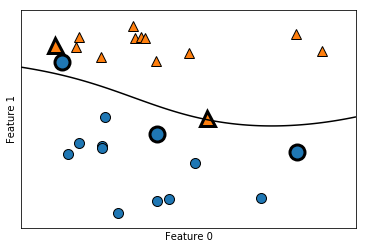

In [10]:
#繪製支持向量
mglearn.plots.plot_2d_separator(svm,X,eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
sv=svm.support_vectors_
sv_labels=svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=15,markeredgewidth=3)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [11]:
#實作調整SVMs參數
#改變 gamma 參數及 C 參數 

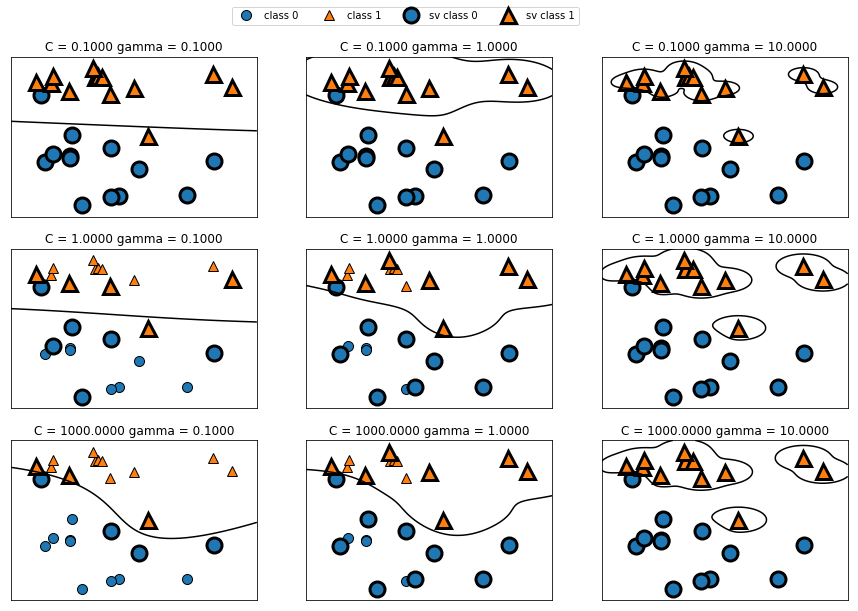

In [15]:
fig,axes=plt.subplots(3,3,figsize=(15,10))

for ax,C in zip(axes,[-1,0,3]):
    for a,gamma in zip(ax,range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)
    axes[0,0].legend(["class 0","class 1","sv class 0","sv class 1"],
                     ncol=4,loc=(.9,1.2))